In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [1]:
pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/127.0 kB 640.0 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/127.0 kB 465.5 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/127.0 kB 465.5 kB/s eta 0:00:01
   ------------------ -------------------- 61.4/127.0 kB 465.5 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/127.0 kB 245.8 kB/s eta 0:00:01
   ---------------------------- ---------- 92.2/127.0 kB 308.0 kB/s eta 0:00:0

In [2]:
data= pd.read_csv(r"C:\Users\shruti sharma\Desktop\Unified Mentor\Heart Disease data.csv")
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Correlation Matrix

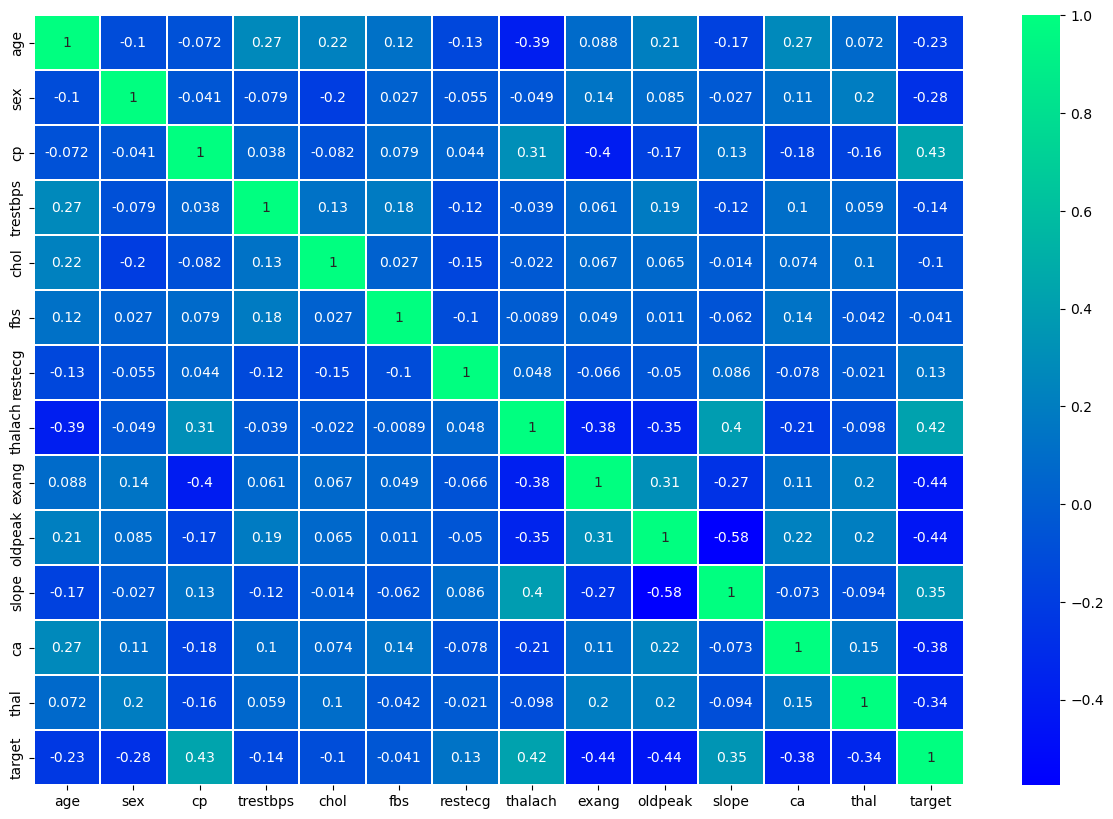

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

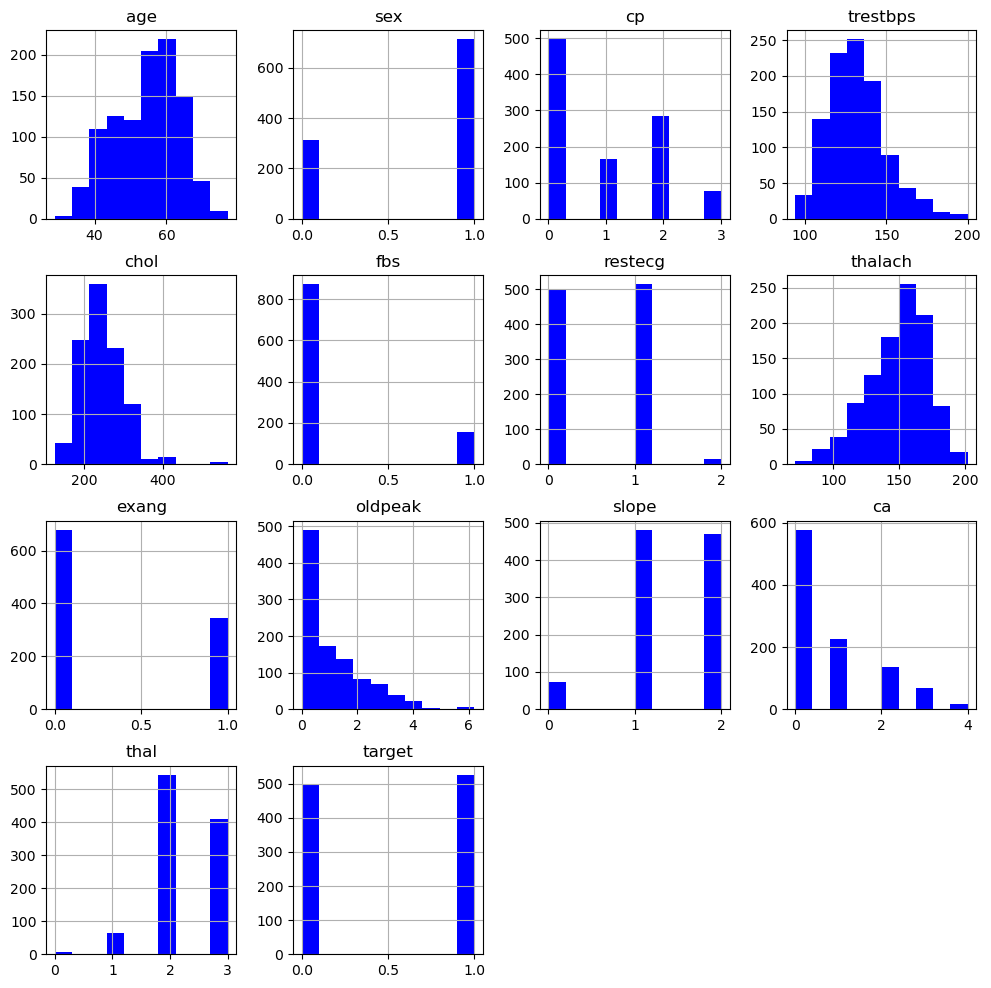

In [6]:
data.hist(figsize=(12,12), color="blue")
plt.savefig('featuresplot')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x= data.drop("target", axis=1)
y=data["target"]

In [9]:
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=40)

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       123
           1       0.90      0.93      0.92       134

    accuracy                           0.91       257
   macro avg       0.91      0.91      0.91       257
weighted avg       0.91      0.91      0.91       257

Testing Accuracy for Decision Tree: 0.9105058365758755
Testing Sensitivity for Decision Tree: 0.923728813559322
Testing Specificity for Decision Tree: 0.8992805755395683
Testing Precision for Decision Tree: 0.8861788617886179


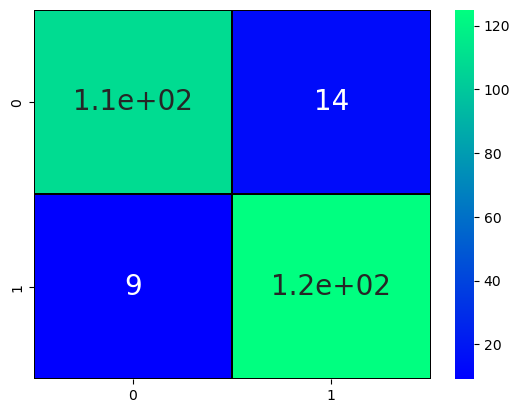

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree_model = DecisionTreeClassifier(max_depth=5,criterion='entropy')
cv_scores = cross_val_score(tree_model, x, y, cv=10, scoring='accuracy')
m=tree_model.fit(x, y)
prediction=m.predict(X_test)
cm= metrics.confusion_matrix(y_test,prediction)
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
print(metrics.classification_report(y_test, prediction))

TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree:',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree:',(TN/(TN+FP)))
print('Testing Precision for Decision Tree:',(TP/(TP+FP)))

## Random Forest Classifier

99.22
Testing Accuracy for Random Forest: 0.9922178988326849
Testing Sensitivity for Random Forest: 0.984
Testing Specificity for Random Forest: 1.0
Testing Precision for Random Forest: 1.0


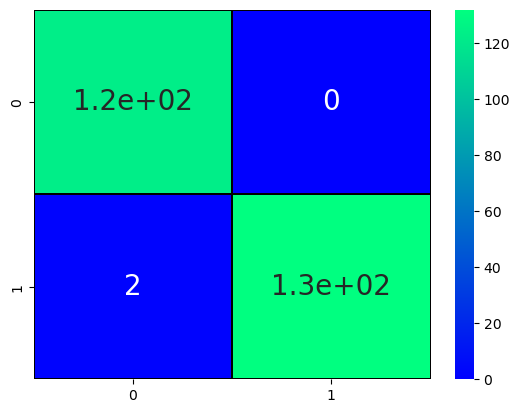

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5)
model2 = rfc.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
cm2=metrics.confusion_matrix(y_test, prediction2)
sns.heatmap(cm2, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm2[0][0]
TN=cm2[1][1]
FN=cm2[1][0]
FP=cm2[0][1]
print(round(metrics.accuracy_score(prediction2,y_test)*100,2))
print('Testing Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Let us see the classification report for Random Forest Classifier:

In [14]:
print(metrics.classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.99      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



## Support Vector Machines(SVM)

Testing Accuracy for SVM: 0.8132295719844358
Testing Sensitivity for Random Forest: 0.8504672897196262
Testing Specificity for Random Forest: 0.7866666666666666
Testing Precision for Random Forest: 0.7398373983739838


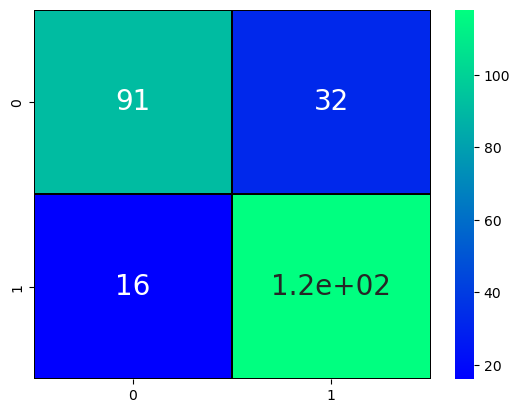

In [15]:
from sklearn.svm import SVC
svm=SVC(C=12,kernel='linear')
model3=svm.fit(X_train,y_train)
prediction3=model3.predict(X_test)
cm3= metrics.confusion_matrix(y_test,prediction3)
sns.heatmap(cm3, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm3[0][0]
TN=cm3[1][1]
FN=cm3[1][0]
FP=cm3[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest:',(TP/(TP+FN)))
print('Testing Specificity for Random Forest:',(TN/(TN+FP)))
print('Testing Precision for Random Forest:',(TP/(TP+FP)))

Let us see the classification report of SVM:

In [16]:
print(metrics.classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       123
           1       0.79      0.88      0.83       134

    accuracy                           0.81       257
   macro avg       0.82      0.81      0.81       257
weighted avg       0.82      0.81      0.81       257



## CASE 1 – For Normal Patient 😊

In [17]:
input=(63,0,0,135,202,1,0,169,1,2.1,2,1,1)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease :'(")
else:
  print("The patient seems to be Normal =)")

The patient seems to be Normal =)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## CASE 2 – For Heart Disease Patient 😥

In [18]:
input=(72,1,1,125,209,0,1,169,0,1.9,2,1,3)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=tree_model.predict(input_reshaped)
if(pre1==1): 
  print("The patient seems to be have heart disease :'(")
else:
  print("The patient seems to be Normal =)")

The patient seems to be have heart disease :'(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Summary